# Project 2: ML Classification

The notebook explains how to create a ML modern to predict death and survival for the Titanic passengers. Passengers' data are available in Kaggle https://www.kaggle.com/c/titanic. The notebook was developed as as study project for the Spiced Academy Data Science Bootcamp.

## Imports

In [208]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


## Titanic dataset: Exploratory data analysis

In [209]:
df =pd.read_csv("train.csv", index_col = False)

In [210]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


''

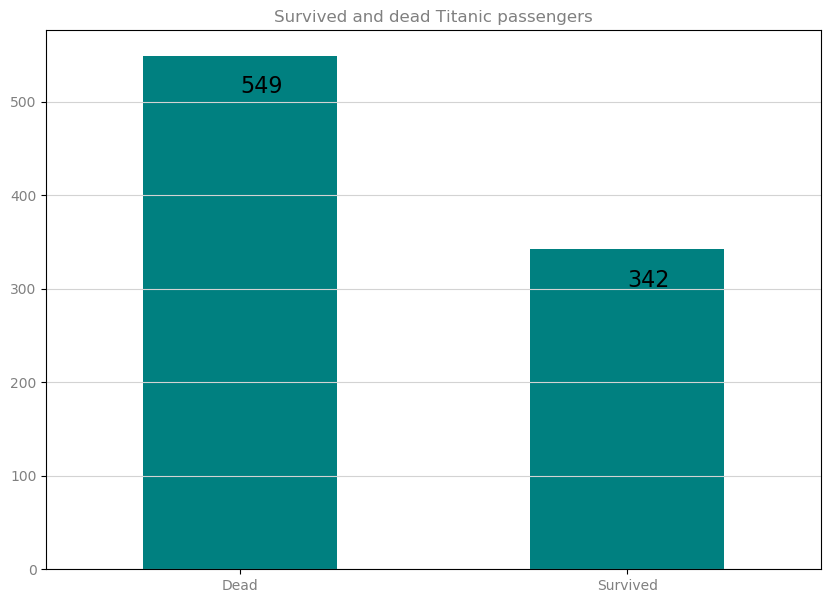

In [211]:
plt.figure(figsize=(10, 7))
ds_plot = df['Survived'].value_counts().plot(kind='bar', color = 'teal')
plt.xticks(ticks=[0, 1], labels=['Dead', 'Survived'], color ='grey', rotation =0)
plt.yticks(color ='grey')
plt.grid(color = 'lightgrey', axis='y')
plt.title("Survived and dead Titanic passengers", color ='grey')

for index,data in enumerate(df['Survived'].value_counts()):
    plt.text(x=index , y =data-40, s=f"{data}" , fontdict=dict(fontsize=16))


;


In [212]:
survived_1c = df[(df['Pclass'] == 1) & (df['Survived']==1)].shape[0]
firstc_pass = df[df['Pclass'] == 1].shape[0]
prop_surv_1cp = (survived_1c/firstc_pass)*100

print("Number of first class passengers survived: ", round(prop_surv_1cp,2))



  

Number of first class passengers survived:  62.96


{'Women in 1 class': 94, 'Women in 2 class': 76, 'Women in 3 class': 144} {'Men 1 class': 122, 'Men 2 class': 108, 'Men 3 class': 347}


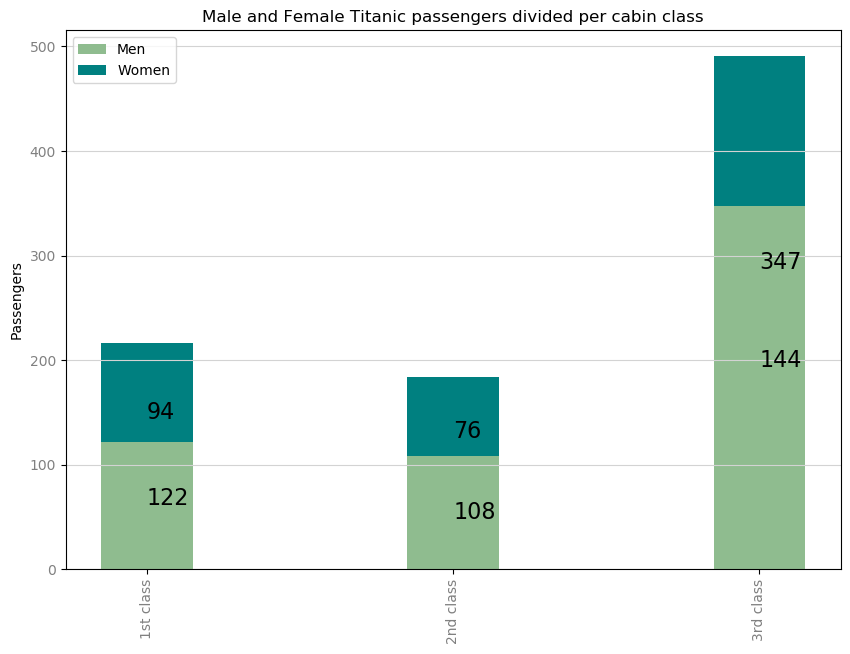

In [213]:
pass_dict_female = { }	
for shipclass in range (1,4):
    pass_dict_female.update({'Women in '+str(shipclass)+' class': df[(df['Pclass'] == shipclass) 
                                                         & (df['Sex']=='female')].shape[0]})

    
pass_dict_male = { }
for shipclass in range (1,4):
    pass_dict_male.update({'Men '+str(shipclass)+' class': df[(df['Pclass'] == shipclass) 
                                                         & (df['Sex']=='male')].shape[0]})
    
print(pass_dict_female, pass_dict_male)


labels = ['1st class', '2nd class', '3rd class']
men = list(pass_dict_male.values())
women = list(pass_dict_female.values())
width = 0.30


fig, ax = plt.subplots(figsize=(10, 7))

ax.bar(labels, men, width, label='Men', color = 'darkseagreen' )
ax.bar(labels, women, width, bottom=men, color = 'teal',
       label='Women')

ax.set_ylabel('Passengers')
ax.set_title('Male and Female Titanic passengers divided per cabin class')
ax.legend()
plt.xticks(color ='grey', rotation =90)
plt.yticks(color ='grey')
plt.grid(color = 'lightgrey', axis='y')

for index,data in enumerate(men):
    plt.text(x=index , y =data-60, s=f"{data}" , fontdict=dict(fontsize=16))

for index,data in enumerate(women):
    plt.text(x=index , y =data+50, s=f"{data}" , fontdict=dict(fontsize=16));




    




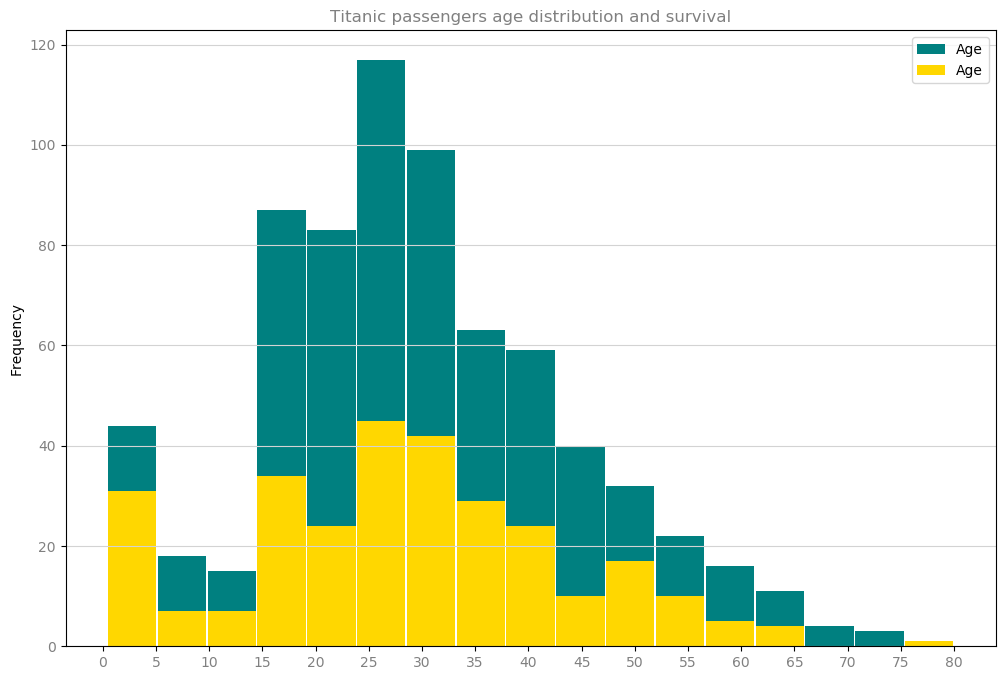

In [214]:
plt.figure(figsize=(12,8))
df['Age'].plot.hist(bins =17, rwidth =0.97, color = 'teal')
df[df['Survived']==1]['Age'].plot.hist(bins =17, rwidth =0.97, color = 'gold')
plt.xticks(np.arange(0, 85, 5), color ='grey', rotation =0)
plt.yticks(color ='grey')
plt.grid(color = 'lightgrey', axis='y')
labels = ['Passengers age', 'Survived passengers']
my_lg=plt.legend()
#my_lg[1].text() = 'Survived passengers'
plt.title("Titanic passengers age distribution and survival", color ='grey');

In [215]:
av_age_surv = df[df['Survived']==1]['Age'].mean()
print("Average age for Titanic survivors (years): ", round(av_age_surv,2))
av_age_dead = df[df['Survived']==0]['Age'].mean()
print("Average age for Titanic dead passengers (years): ", round(av_age_dead,2))


Average age for Titanic survivors (years):  28.34
Average age for Titanic dead passengers (years):  30.63


In [216]:
mean_age = round(df['Age'].mean(), 1)
print(mean_age)



29.7


In [217]:
df['Age'] = df['Age'].fillna(mean_age)


In [218]:
df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  , 29.7 , 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [219]:
contingency_titanic = pd.crosstab(index=df['Survived'], columns= [df['Pclass'], df['Sex']])
print(contingency_titanic)

Pclass        1           2           3     
Sex      female male female male female male
Survived                                    
0             3   77      6   91     72  300
1            91   45     70   17     72   47


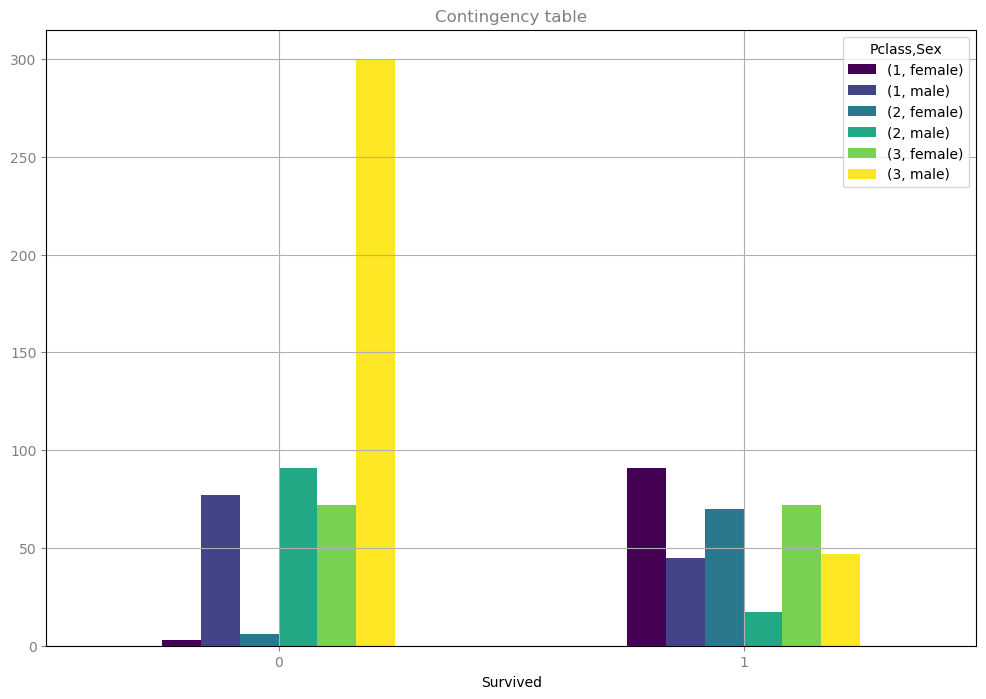

In [220]:
contingency_titanic.plot(kind='bar', stacked=False, colormap='viridis',
                         figsize=(12,8), grid = True)
plt.tick_params(axis='x', colors='grey',  rotation =0)
plt.tick_params(axis='y', colors='grey')
plt.title("Contingency table",color='grey');

In [221]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [222]:
df_feature_eng_titanic = df.drop(columns =['Survived'], axis =1)


In [223]:
df_feature_eng_titanic.columns


Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [224]:
df_feature_eng_titanic['Sex'] = df_feature_eng_titanic['Sex'].replace({'male': 1, 'female': 0})

In [284]:
#df_feature_eng_titanic['Cabin'] = df_feature_eng_titanic['Cabin'].replace(
    #{df['Cabin'].startswith('A'): 1, text.startswith('B'): 2, text.startswith('C'): 3, text.startswith('D'): 4,
     #text.startswith('E'): 5, text.startswith('F'): 6, text.startswith('G'): 7})





In [225]:
sns.reset_defaults()

In [265]:
df_feature_eng_titanic['Fare'].describe()

count    891.000000
mean       0.062858
std        0.096995
min        0.000000
25%        0.015440
50%        0.028213
75%        0.060508
max        1.000000
Name: Fare, dtype: float64

In [264]:
fare_range = df['Fare'].max() - df['Fare'].min()

In [263]:
df_feature_eng_titanic['Fare'] = (df['Fare'] - df['Fare'].min() ) / fare_range



In [262]:
df['Fare']

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

In [286]:
df_lr=df_feature_eng_titanic.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Embarked'], axis=1)

In [288]:
print(df_lr)

     Pclass  Sex   Age      Fare Cabin
0         3    1  22.0  0.014151   NaN
1         1    0  38.0  0.139136   C85
2         3    0  26.0  0.015469   NaN
3         1    0  35.0  0.103644  C123
4         3    1  35.0  0.015713   NaN
..      ...  ...   ...       ...   ...
886       2    1  27.0  0.025374   NaN
887       1    0  19.0  0.058556   B42
888       3    0  29.7  0.045771   NaN
889       1    1  26.0  0.058556  C148
890       3    1  32.0  0.015127   NaN

[891 rows x 5 columns]


In [283]:
#df_lr['Pclass'].isna().sum()
#df_lr['Sex'].isna().sum()
#df_lr['Age'].isna().sum()
#df_lr['Fare'].isna().sum()
df_lr['Cabin'].isna().sum()

687

In [289]:
Xtrain = df_lr
ytrain = df['Survived']

In [290]:
print(Xtrain.shape, ytrain.shape)


(891, 5) (891,)


In [285]:
model = LogisticRegression()
model.fit(Xtrain, ytrain) 

ValueError: could not convert string to float: 'C148'

In [257]:
ypred = model.predict(Xtrain)

In [258]:
model.score(Xtrain,ytrain) #same as accuracy_score(ytrain, ypred)

0.7968574635241302